# Resultados de sociograma

In [2]:
import numpy as np
import math   
import matplotlib.pyplot as plt
import networkx as nx

## Comentarios sobre el uso

Si un integrante no desea votar a nadiese ingresa como si se hubiese votado a si mismo.
Para grupos pequeños o que se conocen mucho puede ser buena idea pedir más de 2 personas por pregunta.

## Mejoras a realizar

- Determinar la relación entre todo par de integrantes del grupo.
- Mostrar una lista con los más votados en orden descendiente.
- Investigar que otras preguntas se pueden hacer u otras formas de mostrar/graficar los resultados.

## Preguntas del Sociograma

### I) ¿Con qué dos personas le gustaría trabajar en grupo?

Como resultado obtenemos los referentes del grupo. Los que se relacionan con todos, los más escuchados y los que marcan cierto liderazgo y/o son el apoyo emocional del grupo.

### II) ¿Cuáles son las personas que me gustaría conocer mejor?

Los no votados, o son íntimos de todos, o no son aceptados.
En este caso hay que estudiar el por qué, y también de hacer algo para mejorar la situación.

Presentar el afiche con el gráfico y la sociomatriz y se hace notar quiénes son los más votados y los menos votados.
No se hace ningún comentario sobre estos últimos.
Se explican las coherencias del dibujo, o sea las preferencias o rechazos.

### III) ¿Quiénes podrían darse a conocer más pero no se animan?

El objetivo es impulsar, dejar la invitación a que a partir de ahora cada uno asuma como protagonista la vida de la comunidad, ya no podemos esperar que nos llegue todo hecho, ahora es cada uno quién debe hacer su parte.
Asumir que otros me digan que puedo dar más y que tengo talentos me debe impulsar a dar todo de mi para ofrecerlo a la comunidad.

## Importamos los datos a utilizar

In [3]:
from quintoP import *
from equipoCONU import *
from usuariosCONU import *

## Matriz de votos

In [4]:
def calculateVotesMatrix(members, edges, votesValues):
  matrix = np.zeros((len(edges), members, members))
  for sociogramN in range(len(edges)):
    for vote in edges[sociogramN]:
      for voteN in range(len(vote)-1):
        matrix[sociogramN][vote[0]][vote[voteN+1]] += votesValues[sociogramN][voteN]
  for i in range(members):
    for j in range(len(edges)):
        matrix[j][i][i] = 0
  return matrix

## Cálculo de pocisiones para circuscribir integrantes en circunferencia

In [5]:
def calculateMembersCoordinates(membersQuantity):
  deltaPi = (2 * math.pi) / membersQuantity
  x = []
  y = []
  for i in range(membersQuantity):
    x.append(math.cos(i * deltaPi))
    y.append(math.sin(i * deltaPi))
  coordinates = np.array([x, y])
  return coordinates

## Cálculo de pocisiones de aristas

In [6]:
def edgesVoteN(memCoord, pairs, N):
  edgesx = []
  edgesy = []
  for pair in pairs:
    edgesx.append([memCoord[0][pair[0]], memCoord[0][pair[N+1]]])
    edgesy.append([memCoord[1][pair[0]], memCoord[1][pair[N+1]]])
  edgesx = np.array(edgesx)
  edgesy = np.array(edgesy)
  return edgesx, edgesy  

def calculateEdgesCoordinates(memCoord, allPairs):
  edgesCoordinates = []
  for sociogramPairs in allPairs:
    sociogramEdges = []
    if len(sociogramPairs) != 0:
      for Nvote in range(len(sociogramPairs[0]) - 1):
        sociogramEdges.append(edgesVoteN(memCoord, sociogramPairs, Nvote))
    edgesCoordinates.append(sociogramEdges)
  return np.array(edgesCoordinates)

## Mostrar gráfico de sociograma

In [7]:
def sociograma(members, edges, color=True, showVotes=True, title="Sociograma"):
  if color:
      colors = ("red", "blue")
      width = (1.2, 1)
      opacity = (1, 0.5)
  else:
      colors = ("black", "black")
      width = (1, 1)
      opacity = (1, 1)

  votesValue = [[2,1], [2,1], [2,1]]
  matrix = calculateVotesMatrix(len(members), edges, votesValue)
  memCoordinates = calculateMembersCoordinates(len(members))
  votes = [matrix[i].sum(axis=0, dtype=int) for i in range(len(edges))]
  edgesCoordinates = calculateEdgesCoordinates(memCoordinates, edges)

  fig, axies = plt.subplots(1, len(edges), figsize=(50, 50))
  fig.suptitle(title)
  fig.set_figwidth((len(members)/2) * len(edges))
  fig.set_figheight(len(members)/2)
  if len(edges) == 1:
     axies = [axies]

  for sociogramN in range(len(edges)):
    # Create a figure and axis
    axies[sociogramN].set_xlim(-1.2, 1.2)
    axies[sociogramN].set_ylim(-1.2, 1.2)
    axies[sociogramN].set_aspect('equal')
    axies[sociogramN].set_axis_off()
    if len(axies) != 1:
      axies[sociogramN].set_title("Gráfico " + ("I" * (sociogramN+1)))

    # Plot members
    for memberN in range(len(members)):
      axies[sociogramN].text(memCoordinates[0][memberN], memCoordinates[1][memberN], str(members[memberN]) + ("", f"\n{str(votes[sociogramN][memberN])}")[showVotes],
              bbox={'facecolor': 'white', 'alpha': 0.9, 'boxstyle': "circle"},
              verticalalignment='center', horizontalalignment='center')

    # Plot edges
    if len(edgesCoordinates[sociogramN]) != 0:
      for edgeN in range(len(edgesCoordinates[sociogramN][0][0])):
        for voteN in range(len(edgesCoordinates[sociogramN])):
          axies[sociogramN].plot(edgesCoordinates[sociogramN][voteN][0][edgeN], edgesCoordinates[sociogramN][voteN][1][edgeN], color=colors[voteN], linewidth=width[voteN], alpha=opacity[voteN])

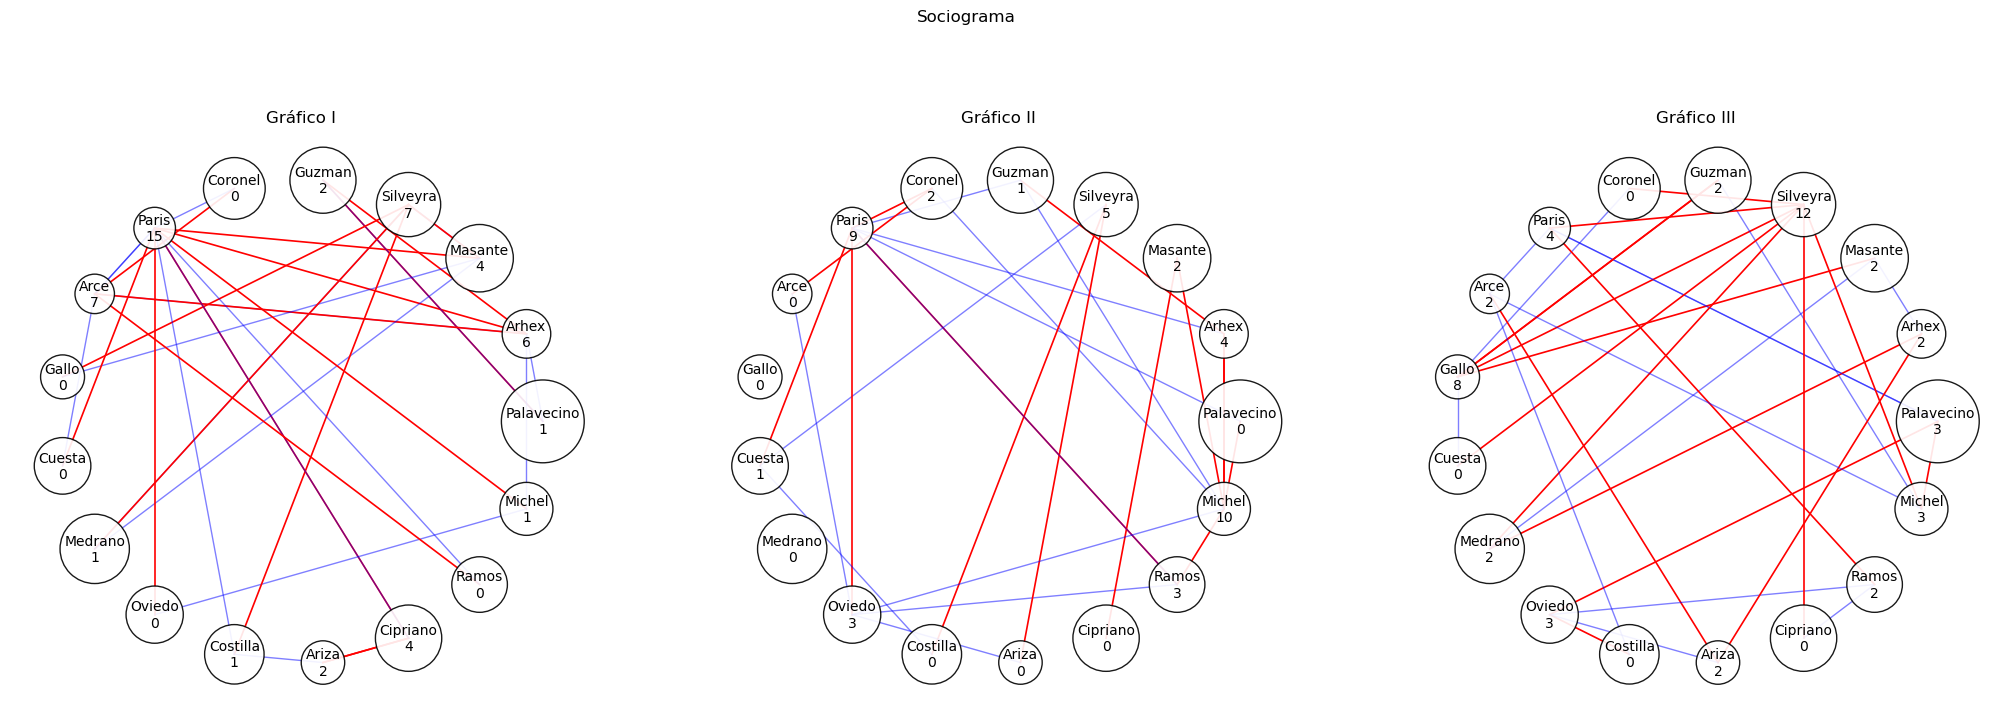

In [8]:
sociograma(quintoP_nombres, [aristas_quintoP_I, aristas_quintoP_II, aristas_quintoP_III])

# Grafos en serio

In [9]:
def calculateRelationsMatrix(members, edges, voteValues):
  matrix = np.zeros((len(members), len(members)))
  # Llenamos la matriz
  for sociogramN in range(len(edges)):
    for vote in edges[sociogramN]:
      for voteN in range(len(vote)-1):
        matrix[vote[0]][vote[voteN+1]] += voteValues[sociogramN][voteN]
  # calculamos el promedio de relación
  for memberA in range(len(members)):
    for memberB in range(memberA):
      averageRelation = (matrix[memberA][memberB] + matrix[memberB][memberA]) / 2
      matrix[memberA][memberB] = averageRelation
      matrix[memberB][memberA] = averageRelation
  # Sumatoria de relaciones en diagonal
  for member in range(len(members)):
    matrix[member][member] = 0
    matrix[member][member] = matrix[member].sum(axis=0)
  return matrix

In [30]:
def grafo(members, edges):

  # Matriz de relación
  votesValues = [[50, 45], [25, 20], [5, 4]]
  matrix = calculateRelationsMatrix(members, edges, votesValues)

  # Hacemos el grafo  
  grafo = nx.Graph()
  #Agregamos los nodos
  grafo.add_nodes_from(members)
  # Agregamos aristas
  for i in range(len(members)):
    for j in range(i):
      if matrix[i][j] != 0:
        grafo.add_edge(members[i], members[j], weight=matrix[i][j])

  # Dibujamos
  plt.figure(figsize=(15, 15))
  pos = nx.layout.spring_layout(grafo, iterations=100000)
  nx.draw_networkx(grafo, pos, node_size=4500, width=2, edge_color='gray')
  plt.show()
  

In [31]:
grafo(quintoP_nombres, [aristas_quintoP_I, aristas_quintoP_II, aristas_quintoP_III])

47.5


KeyboardInterrupt: 

<Figure size 1500x1500 with 0 Axes>

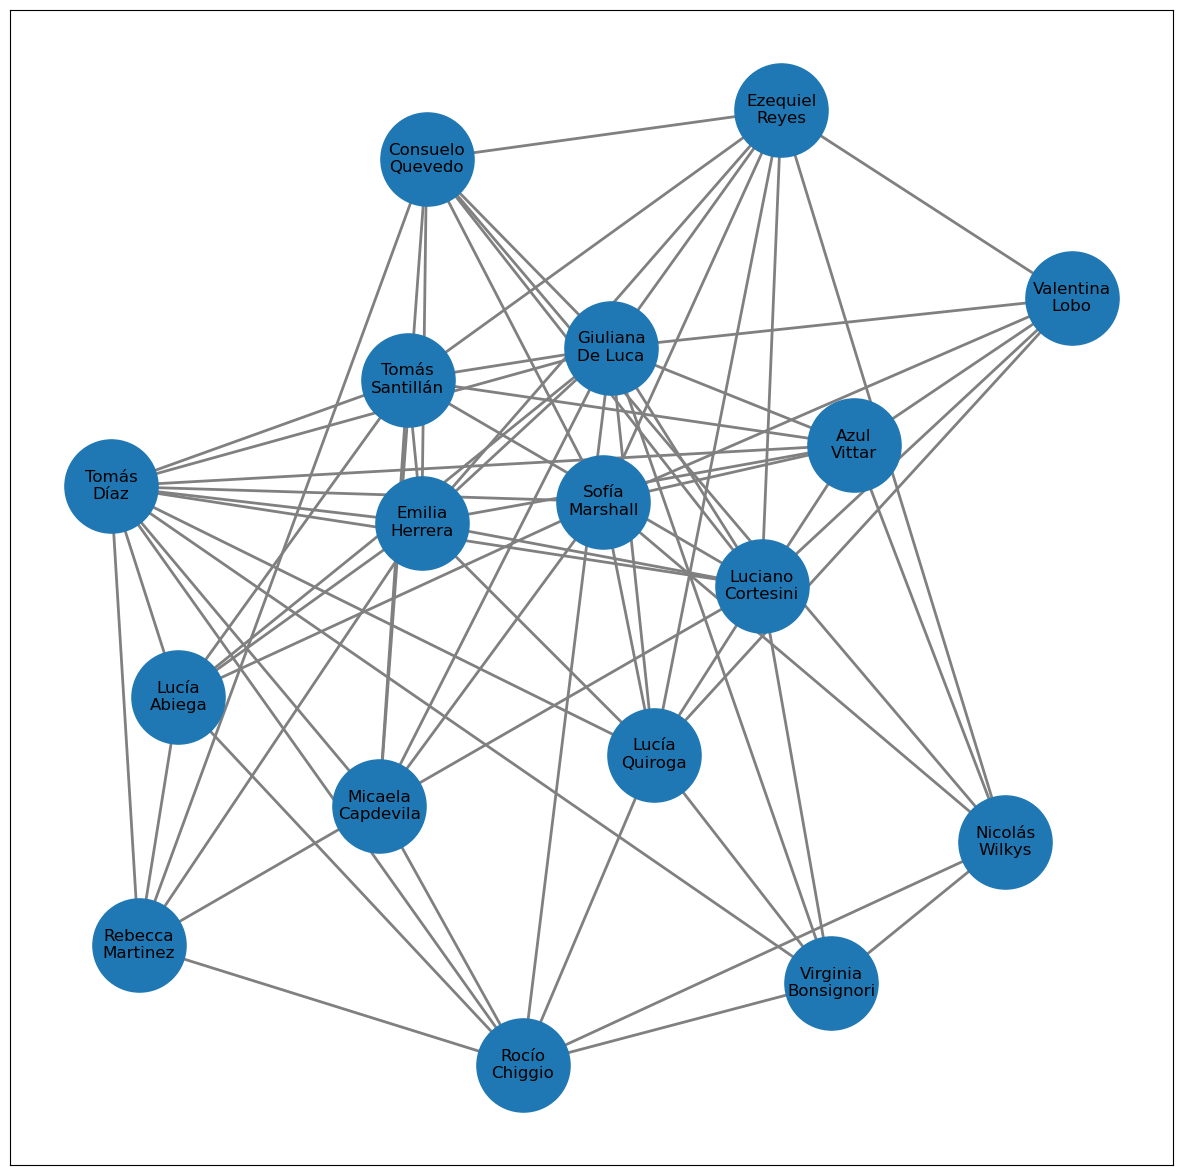

In [12]:
grafo(usuarios, [aristas_usuarios_I, aristas_usuarios_II, aristas_usuarios_III])

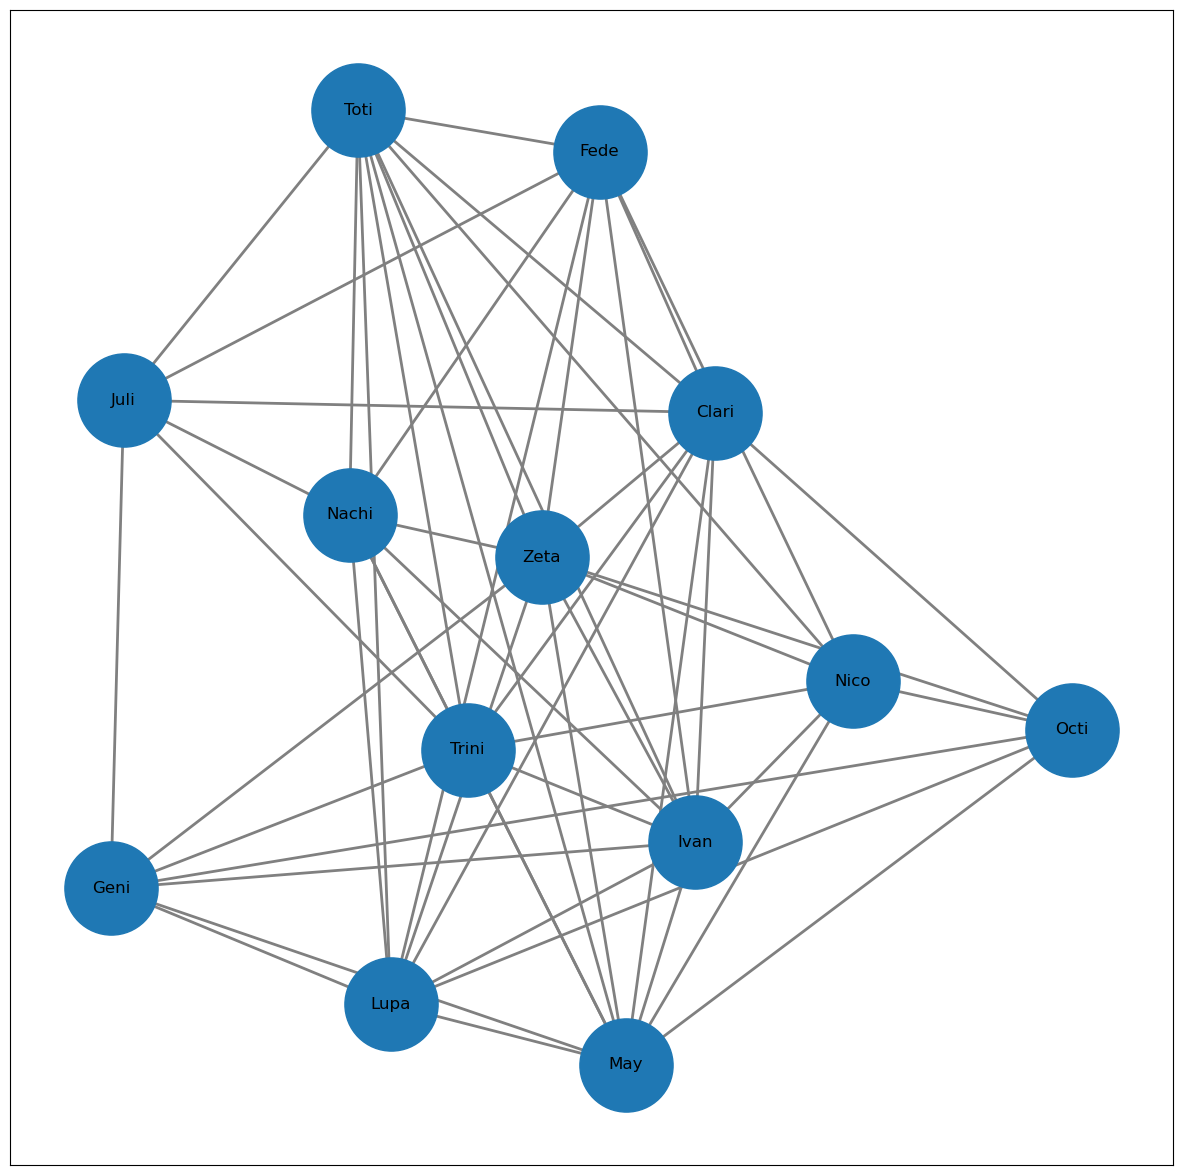

In [13]:
grafo(equipo, [aristas_equipo_I, aristas_equipo_II, aristas_equipo_III])